In [0]:
##Importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
##Upload the Kaggle credentials
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ankit001m","key":"afaca0de486c82fd73f3fb19ea3b4023"}'}

In [3]:
## Is the file loaded
ls -1ha kaggle.json

kaggle.json


In [0]:
##File configuration
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
##downloading the dataset
!pip install kaggle
!kaggle competitions download -c digit-recognizer

    100% |████████████████████████████████| 61kB 5.4MB/s 
    100% |████████████████████████████████| 235kB 14.7MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify
 89% 65.0M/73.2M [00:01<00:00, 53.3MB/s]
100% 73.2M/73.2M [00:01<00:00, 58.8MB/s]
 88% 43.0M/48.8M [00:00<00:00, 46.3MB/s]
100% 48.8M/48.8M [00:00<00:00, 110MB/s] 
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 102MB/s]


In [14]:
##Unzip
!ls

kaggle (1).json  sample_data		test.csv
kaggle.json	 sample_submission.csv	train.csv


In [0]:
##reading the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [16]:
##Getting the initial feel of the data
train.head(7)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
##targte variable is label
##Lets inspect label

train['label'].value_counts()

'''
we have comparable digits in the dataset.
'''

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [20]:
##Lets check the shape of the dataset
print("The training data contains {} rows and columns".format(train.shape))
print("The testing  data contains {} rows and columns".format(test.shape))

The training data contains (42000, 785) rows and columns
The testing  data contains (28000, 784) rows and columns


In [7]:
##Lets seperate the target variable
y_train = train['label'].values
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [0]:
##deleting the label
del train['label']


In [0]:
##converting the dataframes in to numpy array
X_train = train.iloc[:,:].values
X_test  = test.iloc[:,:].values

##Converting in to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

##Normalizing it by dividing with 255
X_train = X_train/255
X_test = X_test/255

In [0]:
##Reshaping the X_train and X_test
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

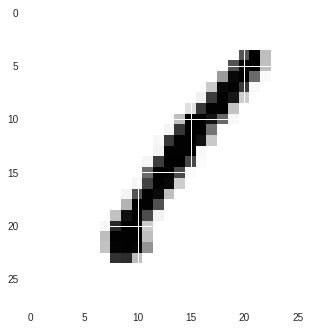

In [22]:
x = train
x = x.values.reshape(-1,28,28,1)
plt.imshow(x[0][:,:,0])
del x

**DEEP LEARNING MODELLING USING KERAS 
A VARIANT OF LeNet-5**

In [23]:
##Necessary imports from keras

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten

from keras.layers import Conv2D, MaxPooling2D

from keras.utils import  to_categorical

from keras.optimizers import Adam


Using TensorFlow backend.


In [24]:
# Convert class vectors to binary class matrices.
y_train = to_categorical(y_train,10)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [25]:
import keras

##laying out the model 

model = Sequential()

#layer-1
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (28,28,1)))

model.add(Activation('relu'))

#layer-2
model.add(Conv2D(32,(3,3)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

#layer-3
model.add(Conv2D(64, (3, 3), padding='same'))

model.add(Activation('relu'))

#layer-4
model.add(Conv2D(64, (3, 3)))

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

#layer-5
model.add(Flatten())

#layer-6
model.add(Dense(512))

model.add(Activation('relu'))

model.add(Dropout(0.50))

#layer-7
model.add(Dense(256))

model.add(Activation('relu'))

model.add(Dropout(0.3))

#layer-8
model.add(Dense(128))

model.add(Activation('relu'))

#output_layer(layer-9)

model.add(Dense(10))

model.add(Activation('softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
__________

In [0]:
##initialize the Adam optimizer
opt = Adam(lr = 0.001)

# Let's train the model using Adma
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
##Learning rate reduction
from keras.callbacks import ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 3,verbose = 1,factor = 0.2,min_lr = 0.00001)

In [0]:
##data agumentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center = False,
                            samplewise_center = False,
                            featurewise_std_normalization = False,
                            samplewise_std_normalization = False,
                            zca_whitening = False,
                            rotation_range = 10,
                            zoom_range = 0.1,
                            width_shift_range = 0.1,
                            height_shift_range = 0.1,
                            horizontal_flip = False,
                            vertical_flip = False)

datagen.fit(X_train)

In [30]:
##Fit the model
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size = 128),epochs = 100,verbose = 2,callbacks = [lr_reduction])

Epoch 1/100
 - 17s - loss: 0.5611 - acc: 0.8130
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:972: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: loss,acc,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 16s - loss: 0.1632 - acc: 0.9500
Epoch 3/100
 - 16s - loss: 0.1121 - acc: 0.9664
Epoch 4/100
 - 16s - loss: 0.0970 - acc: 0.9716
Epoch 5/100
 - 16s - loss: 0.0813 - acc: 0.9771
Epoch 6/100
 - 16s - loss: 0.0739 - acc: 0.9786
Epoch 7/100
 - 16s - loss: 0.0706 - acc: 0.9790
Epoch 8/100
 - 17s - loss: 0.0628 - acc: 0.9814
Epoch 9/100
 - 16s - loss: 0.0606 - acc: 0.9828
Epoch 10/100
 - 16s - loss: 0.0546 - acc: 0.9838
Epoch 11/100
 - 16s - loss: 0.0542 - acc: 0.9840
Epoch 12/100
 - 16s - loss: 0.0502 - acc: 0.9853
Epoch 13/100
 - 17s - loss: 0.0509 - acc: 0.9859
Epoch 14/100
 - 16s - loss: 0.0452 - acc: 0.9873
Epoch 15/100
 - 16s - loss: 0.0494 - acc: 0.9858
Epoch 16/100
 - 16s - loss: 0.0446 - acc: 0.9873
Epoch 17/100
 - 16s - loss: 0.0434 - acc: 0.9872
Epoch 18/100
 - 16s - loss: 0.0430 - acc: 0.9879
Epoch 19/100
 - 16s - loss: 0.0440 - acc: 0.9874
Epoch 20/100
 - 17s - loss: 0.0426 - acc: 0.9881
Epoch 21/100
 - 16s - loss: 0.0382 - acc: 0.9889
Epoch 22/100
 - 16s - loss: 0.0384 - acc

In [0]:
##Prediction
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis = 1)
y_pred = pd.Series(y_pred,name = 'label')
submission = pd.concat([pd.Series(range(1,28001),name = 'ImageId'),y_pred],axis = 1)
submission.to_csv('cnn_mnist.csv',index = False)

In [33]:
!ls

cnn_mnist.csv  sample_data	      test.csv
kaggle.json    sample_submission.csv  train.csv


In [0]:
from google.colab import files
files.download('cnn_mnist.csv')